# Introduction

In this report, we dive into the essential machine learning concept of classification, a cornerstone technique for making sense of data in numerous fields. Our exploration is twofold:

1. **Analyzing the Pima Dataset**: Here, we focus on a critical healthcare challenge—diagnosing diabetes. Our task is to apply classification models to predict the occurrence of diabetes, offering a window into how machine learning can aid in medical decision-making.

2. **Exploring the MNIST Dataset**: We shift gears to image recognition, utilizing a subset of the MNIST dataset. Our objective is to classify handwritten digits, showcasing the versatility of classification algorithms in interpreting visual data.

This practical session is not just an exercise in applying algorithms but a deeper dive into understanding their real-world implications, particularly in sensitive domains like healthcare. The report aims to capture the nuances of our analyses, the decision-making process behind choosing specific models, and the critical evaluation of their performance.


## Imports

In [5]:
#Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score,confusion_matrix, precision_score, f1_score, balanced_accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import warnings
import collections
warnings.filterwarnings("ignore")
seed=123
np.random.seed(seed)

# Predicting Diabetes on the Pima dataset

## Loading the data


In [6]:
X = np.load("pima.npz")
X1, Y1 = X["xall"], X["yall"]

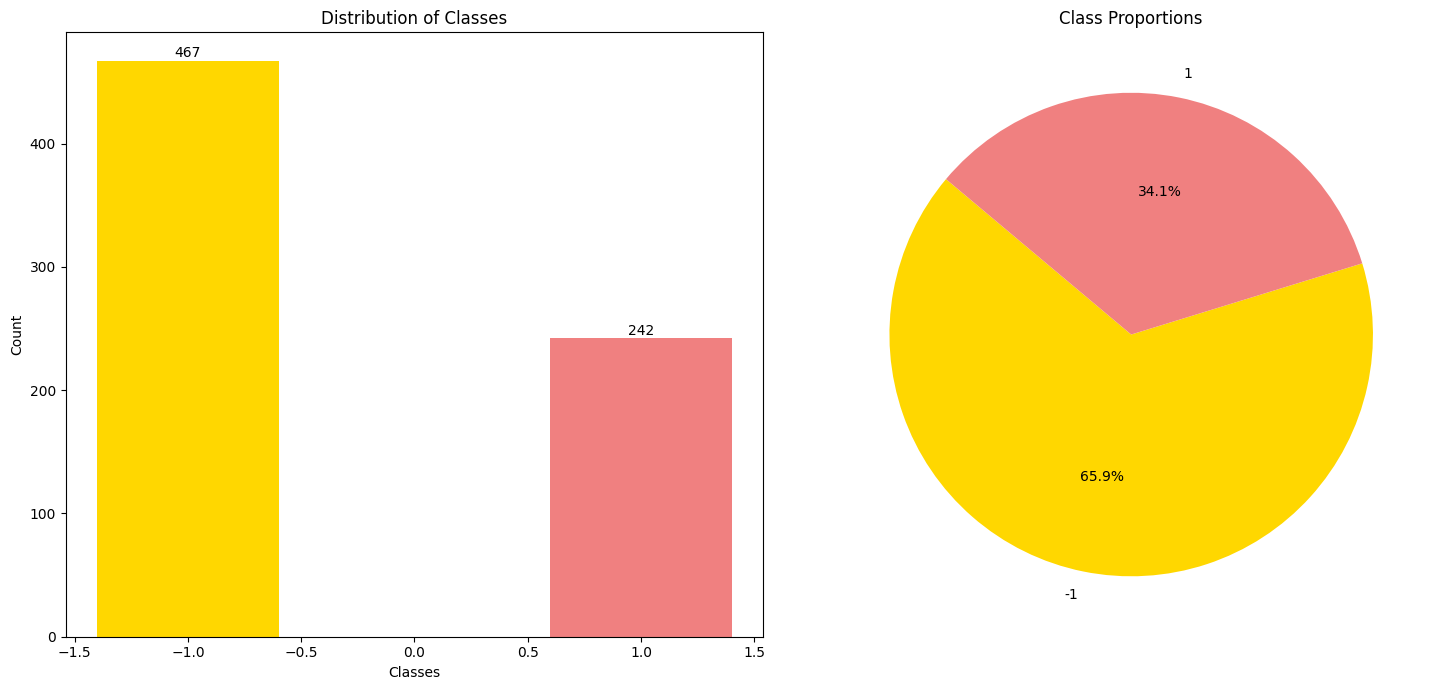

In [7]:
class_counts=collections.Counter(Y1)
classes = list(class_counts.keys())
counts = list(class_counts.values())
n_classes = len(classes)
# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Bar plot on the first subplot
ax[0].bar(classes, counts, color=['gold', 'lightcoral'])
for i, v in enumerate(counts):
    ax[0].text(classes[i], v + 3, str(v), ha='center')
ax[0].set_xlabel('Classes')
ax[0].set_ylabel('Count')
ax[0].set_title('Distribution of Classes')

# Pie chart on the second subplot
ax[1].pie(counts, labels=classes, colors=['gold', 'lightcoral'], autopct='%1.1f%%', startangle=140)
ax[1].set_title('Class Proportions')

# Show the figure with both plots
plt.tight_layout()
plt.show()

**Interpretation**

* Our dataset exhibits an imbalance, consisting of 467 non-diabetic individuals and 242 diabetic individuals. This indicates that approximately 34.1% of the patients in our dataset are diagnosed with diabetes, while the remaining majority do not have.

In [8]:
# Define the attribute names for the dataset
attributes = [
    "Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
    "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"
]

# Create a DataFrame with the provided data (X1) and the defined attribute names
data = pd.DataFrame(X1, columns=attributes)

# Display statistical summaries of the DataFrame
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,3.747532,121.607898,69.643159,20.765867,80.531735,32.453032,0.470961,33.021157
std,3.339502,30.490598,18.135582,15.899540,112.678399,6.950733,0.325256,11.669089
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.374000,29.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.629000,40.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000


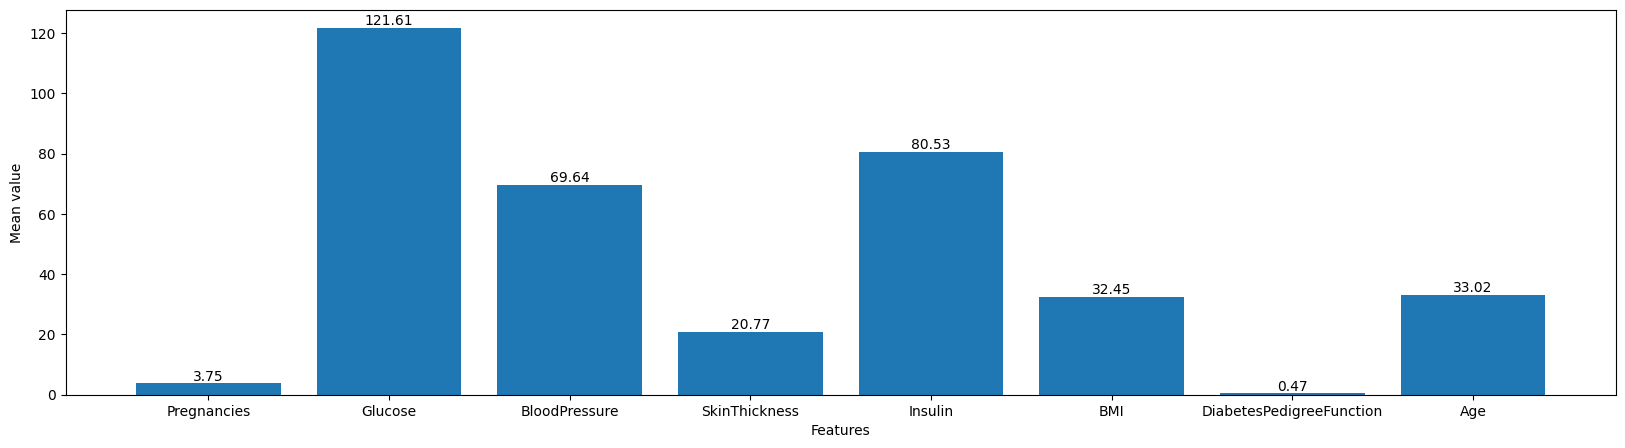

In [9]:
# Calculate the means of each attribute
means = X1.mean(axis=0)

# Create a bar plot to visualize the mean values
plt.figure(figsize=(20, 5))
bars = plt.bar(attributes, means)

# Adding mean values as text on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

# Add labels and display the plot
plt.xlabel("Features")
plt.ylabel("Mean value")
plt.show()

**Interpretation**
* The data indicates an elevated average number of pregnancies among the patients, with a mean of 3.75, suggesting a significant reproductive history. Furthermore, the glucose concentration exceeds the typical threshold of 100, pointing to a prevalence of hyperglycemia. The patient demographic appears to have a higher proportion of individuals with diabetes compared to those without. Predominantly, the patient age group is young, with an average age of 33. Additionally, the high mean Diabetes Pedigree Function value signals a substantial genetic disposition for diabetes, indicating a greater likelihood of the condition being passed down through family lines.


## Know the data

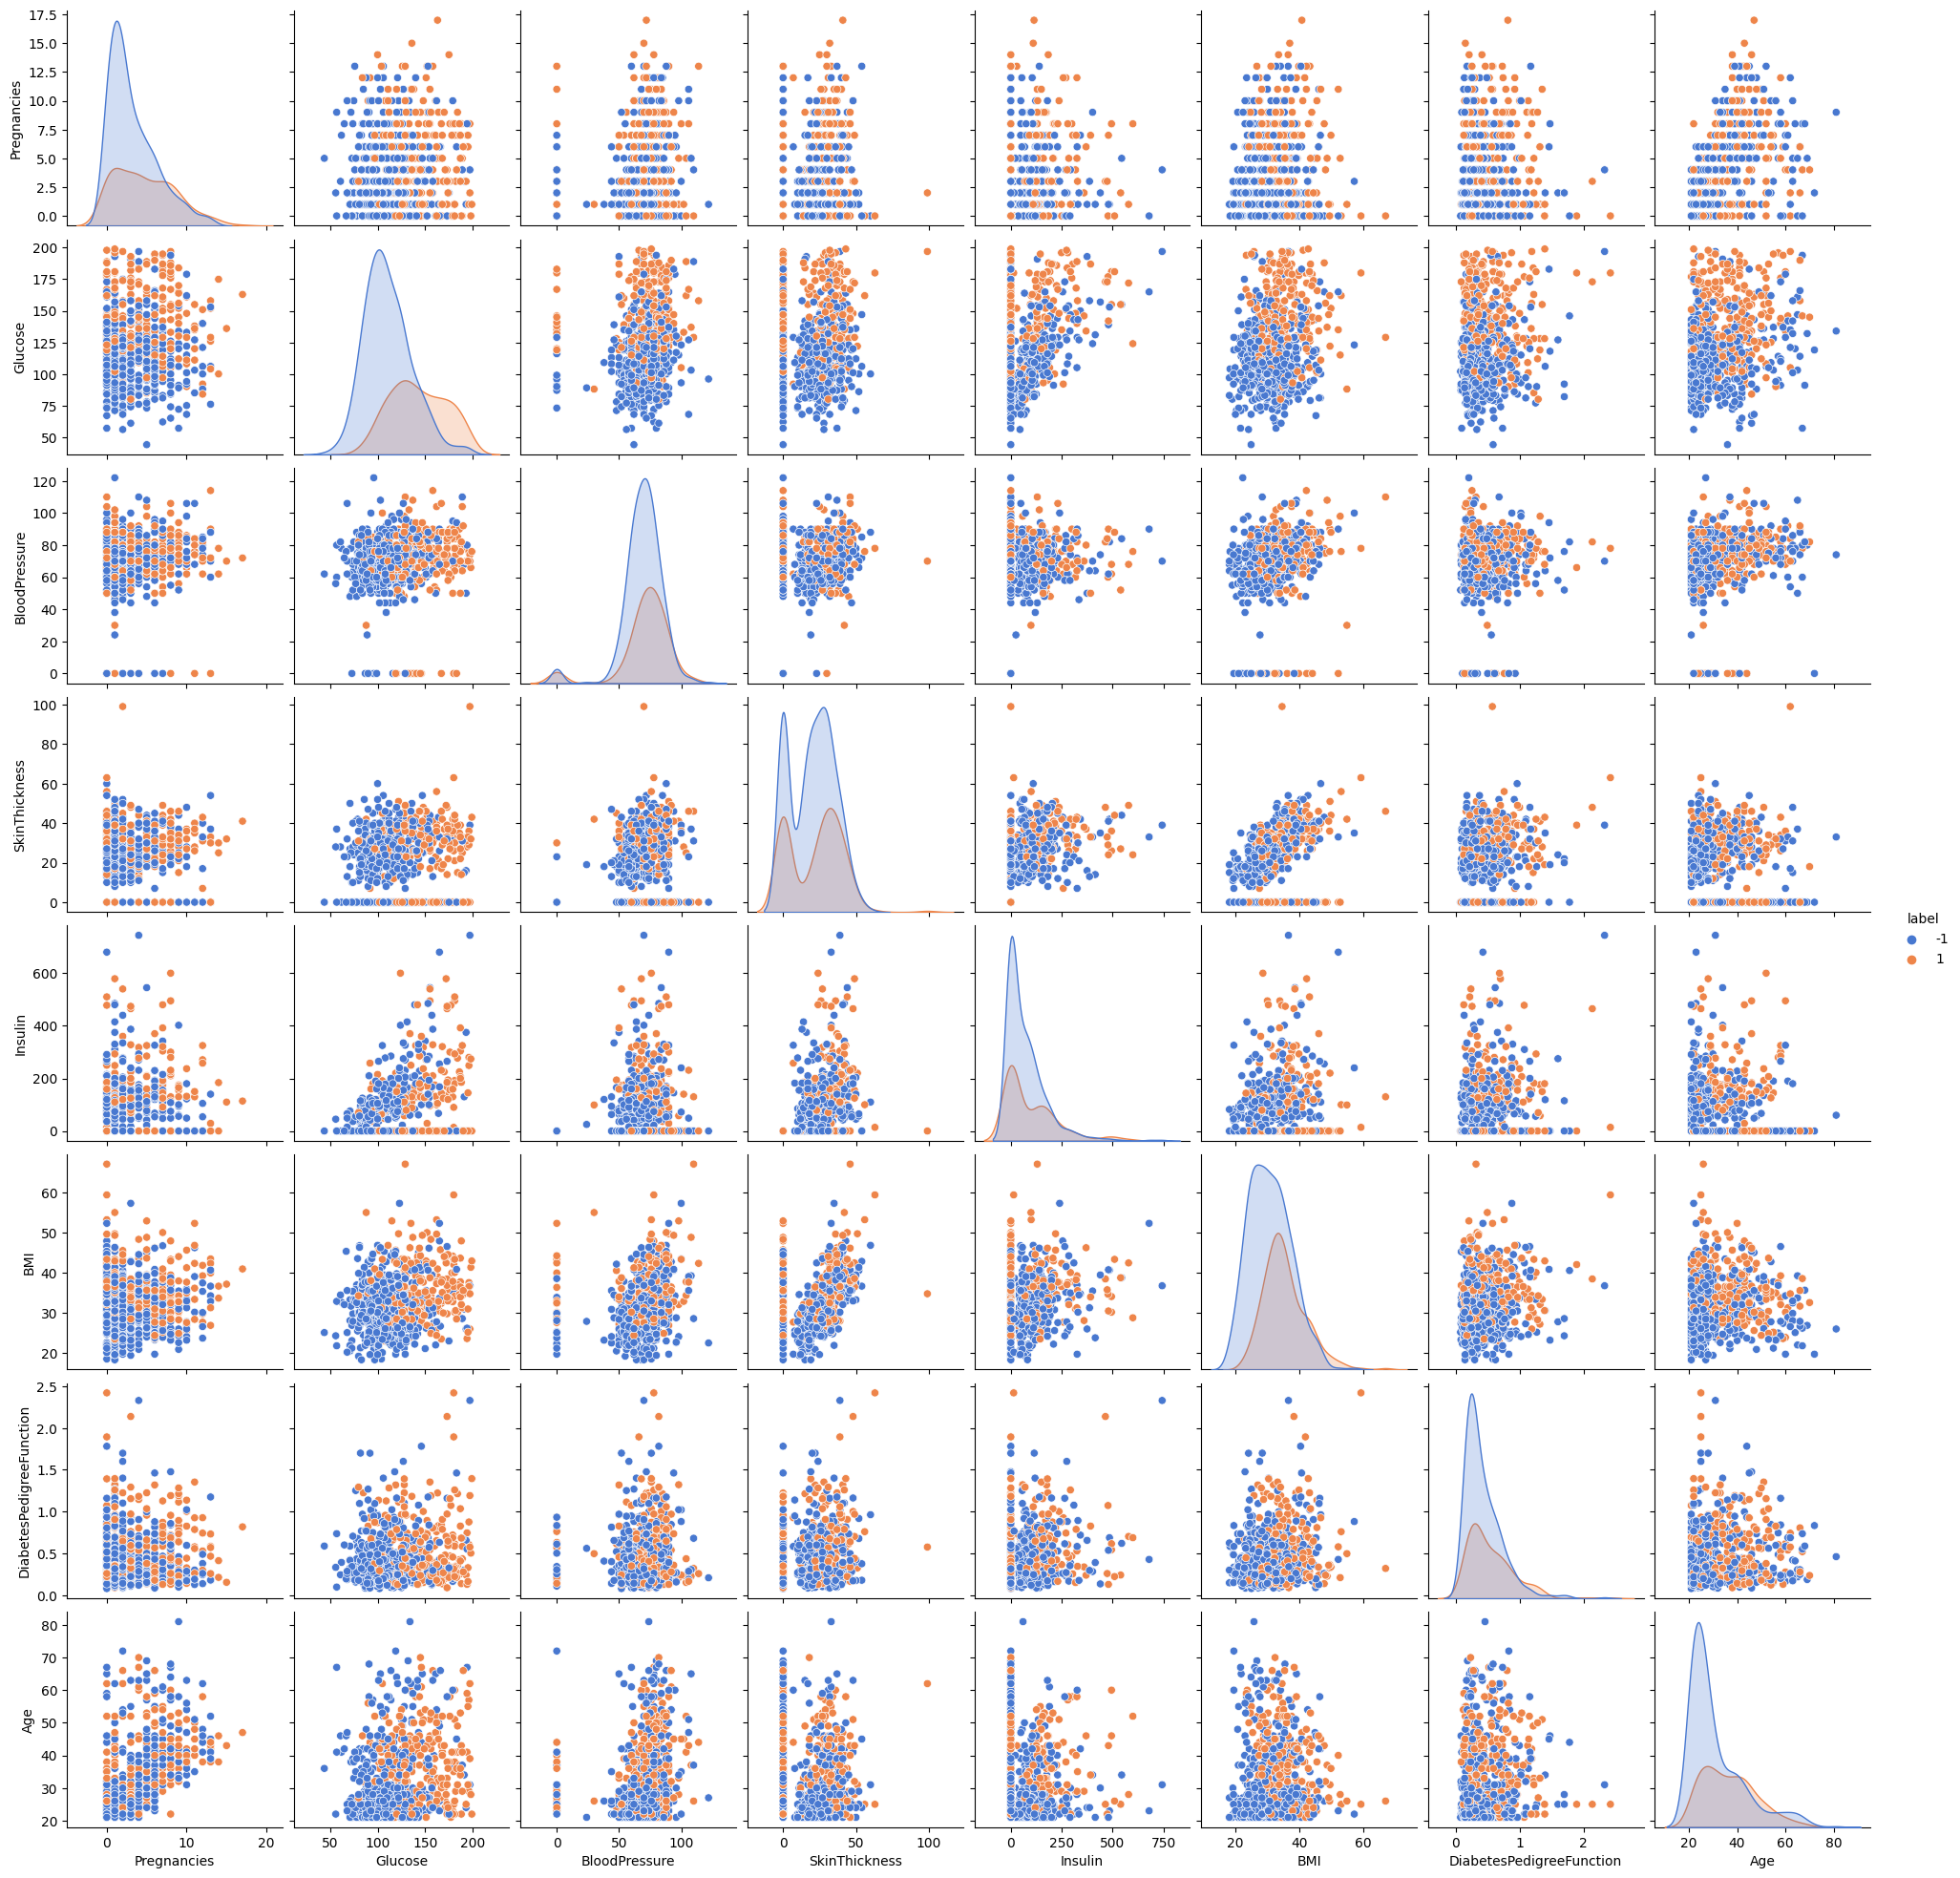

In [10]:
# Define the attribute names for the dataset
attributes = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age"]

# Create a DataFrame with the provided data (X1) and the defined attribute names
df_x1 = pd.DataFrame(X1, columns=attributes)

# Add the "label" column to the DataFrame
df_x1["label"] = Y1

# Create a pair plot to visualize relationships between attributes with hue based on "label"
sns.pairplot(df_x1, hue="label", palette="muted")

# Display the pair plot
plt.show()

**Interpretation**

he PairGrid suggest that certain variables are indicative of the data class. Notably, "Glucose" emerges as a significant predictor; its corresponding scatterplots demonstrate a bifurcation of data points into two distinct clusters. Typically, diabetic patients exhibit elevated glucose levels, whereas non-diabetic individuals maintain lower concentrations. This distinction is further evidenced by the separate distribution ranges for glucose levels when segmented by class, which aligns with medical knowledge of the strong association between glucose levels and diabetes.

Additionally, there appears to be a relationship between "BMI" and "Glucose," suggesting that BMI could also be instrumental in predicting diabetes.

When examining scatterplots that incorporate "Age," a pattern emerges where individuals with diabetes generally present with higher age values, indicating that age may be a contributing factor in the onset of diabetes.


In [11]:
#Split the data
X_train, X_test, Y_train, Y_test = X1[:300,:], X1[300:,:], Y1[:300], Y1[300:]

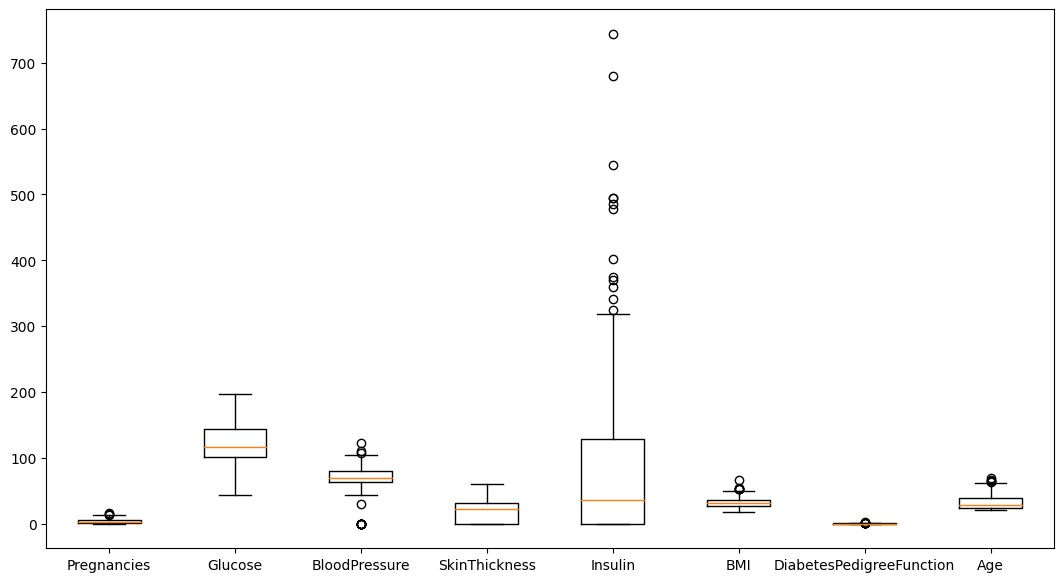

Pregnancies std: 3.32
Glucose std: 30.02
BloodPressure std: 17.89
SkinThickness std: 15.65
Insulin std: 116.10
BMI std: 7.29
DiabetesPedigreeFunction std: 0.33
Age std: 10.85


In [12]:
# Set the figure size
plt.figure(figsize=(13, 7))

# Create a box plot for the training data with labels for attributes
plt.boxplot(X_train, labels=attributes)

# Display the box plot
plt.show()

# Calculate and print the standard deviation for each attribute
std_pima = X_train.std(axis=0)
for i in range(len(attributes)):
    print(attributes[i] + " std: {:.2f}".format(std_pima[i]))

**Interpretation**
* Features have large different values of variances as we can see in the boxplot.So we need to scale it .

* Scaling/normalizing is very important and common in machine learning because most models suppose that the features and scaled or normalized. Plus, if a feature is way bigger than the others, it might dominate the objective function and the gradient descent and make the model unable to correctly learn from the other features. Scaling ensures also rapid convergence of some algorithms.

In [13]:
#Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Calculate the standard deviation for each attribute and print them
std_pima = X_train.std(axis=0)

for attribute, std in zip(attributes, std_pima):
    print(f"{attribute} std: {std:.2f}")

Pregnancies std: 1.00
Glucose std: 1.00
BloodPressure std: 1.00
SkinThickness std: 1.00
Insulin std: 1.00
BMI std: 1.00
DiabetesPedigreeFunction std: 1.00
Age std: 1.00


**Interpretation**

We now see how features are scaled wich we can now confidently proceed with building and training the model.

##  Bayesian decision and linear classification

###LDA (Linear Discriminant Analysis)

In [15]:
Lda = LDA()
Lda.fit(X_train, Y_train)
pred = Lda.predict(X_test)
print("Accuracy = ",accuracy_score(Y_test,pred))
print("AUC score = ",roc_auc_score(Y_test,Lda.predict_proba(X_test)[:, 1]))

Accuracy =  0.7946210268948656
AUC score =  0.8636637129416913


In [16]:
Lda_model = LDA()
param_grid = {'shrinkage' : np.linspace(0,1),"solver":['lsqr','eigen']}
gd_lda = GridSearchCV(Lda_model, param_grid, cv=5)
gd_lda.fit(X_train, Y_train)

pred = gd_lda.predict(X_test)
print("Best parameters = ",gd_lda.best_params_)
print("Best score = ",gd_lda.best_score_)

Best parameters =  {'shrinkage': 0.02040816326530612, 'solver': 'lsqr'}
Best score =  0.76


In [17]:
models_=[Lda, gd_lda]

data = {"model": ["LDA(Default)","LDA(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_],
      "AUC score": [roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1]) for model in models_]}

df_lda = pd.DataFrame(data, columns=['model','Accuracy','AUC score'])
df_lda

,model,Accuracy,AUC score
0,LDA(Default),0.794621,0.863664
1,LDA(grid search),0.797066,0.864293


**Interpretation**

* Using GridSearch cross validation to fine-tune the shrinkage parameters did enhance the model's performance, though the improvement was marginal and the overall metrics remained largely unchanged."

### QDA (Quadratic Discriminant Analysis)

In [18]:
qda = QDA()
qda.fit(X_train, Y_train)
pred = qda.predict(X_test)
print("Accuracy = ",accuracy_score(Y_test,pred))
print("AUC score = ",roc_auc_score(Y_test,qda.predict_proba(X_test)[:, 1]))

Accuracy =  0.7603911980440098
AUC score =  0.8109342522699924


**Interpretation**

* The default QDA model shows less performance than the default LDA model.

In [19]:
qda_model = QDA()
param_grid = {'reg_param' : np.linspace(0,1)}
gd_qda = GridSearchCV(qda_model, param_grid, cv=5)
gd_qda.fit(X_train, Y_train)
pred = gd_qda.predict(X_test)
print("Best parameters = ",gd_qda.best_params_)
print("Best score = ",gd_qda.best_score_)

Best parameters =  {'reg_param': 0.6122448979591836}
Best score =  0.7300000000000001


In [20]:
models_=[qda, gd_qda]

data = {"model": ["QDA(Default)","QDA(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_],
      "AUC score": [roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1]) for model in models_]}

df_qda = pd.DataFrame(data, columns=['model','Accuracy','AUC score'])
df_qda

,model,Accuracy,AUC score
0,QDA(Default),0.760391,0.810934
1,QDA(grid search),0.801956,0.857510


**Interpretation**

* By performing Gridsearch cross validation for the parameters of the reg_param, the performance did improve. In fact the accuracy increased from 0.76 to 0.80 and the AUC score increased from 0.81 to 0.85.


### GNB (Gaussian Naive Bayes)

In [21]:
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
pred = gnb.predict(X_test)
print("Accuracy = ",accuracy_score(Y_test,pred))
print("AUC score = ",roc_auc_score(Y_test,gnb.predict_proba(X_test)[:, 1]))

Accuracy =  0.7677261613691931
AUC score =  0.8310359916858113


**Interpretation**

* The two models LDA and QDA show better results of accuracy and AUC on test dataset than the Gaussian Naive Bayes model.

### LR(Logistic Regression)

In [22]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
print("Accuracy = ", accuracy_score(Y_test, pred))
print("AUC score = ", roc_auc_score(Y_test, clf.predict_proba(X_test)[:, 1]))

Accuracy =  0.7946210268948656
AUC score =  0.8647576851547971


**Interpretation**

* The logistic regression model outstrips the Gaussian Naive Bayes in terms of performance. Similarly, the default QDA model is surpassed by logistic regression; however, fine-tuning the QDA's 'reg_param' through GridSearchCV brings its efficacy nearly on par with that of the logistic regression. Additionally, the LDA demonstrates comparable effectiveness to the logistic regression classifier.

In [23]:
model_clf= LogisticRegression(penalty="l1", random_state=0)
param_grid = {"C" : np.logspace(-4,4), "solver" : ["liblinear", "saga"]}
gd_clf = GridSearchCV(model_clf, param_grid, cv = 5)
gd_clf.fit(X_train, Y_train)
best_clf = gd_clf.best_estimator_
print(f"Best Parameteres are: {gd_clf.best_params_}")


Best Parameteres are: {'C': 0.08685113737513521, 'solver': 'saga'}


In [24]:
models_=[clf, best_clf]

data = {"model": ["LR(Default)","LR(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_],
      "AUC score": [roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1]) for model in models_]}

df_LR = pd.DataFrame(data, columns=['model','Accuracy','AUC score'])
df_LR

,model,Accuracy,AUC score
0,LR(Default),0.794621,0.864758
1,LR(grid search),0.799511,0.868915


**Interpretation**

*  We notice when using the "l1" penalty we have a better performance score. This is because the "l1" allows the models to select the most relevant features preventing overfitting on the training data (See the section below to see what features were removed). Thus, the new score is very close to the previous one this improvmeent was slighly better.

### Weight Variables

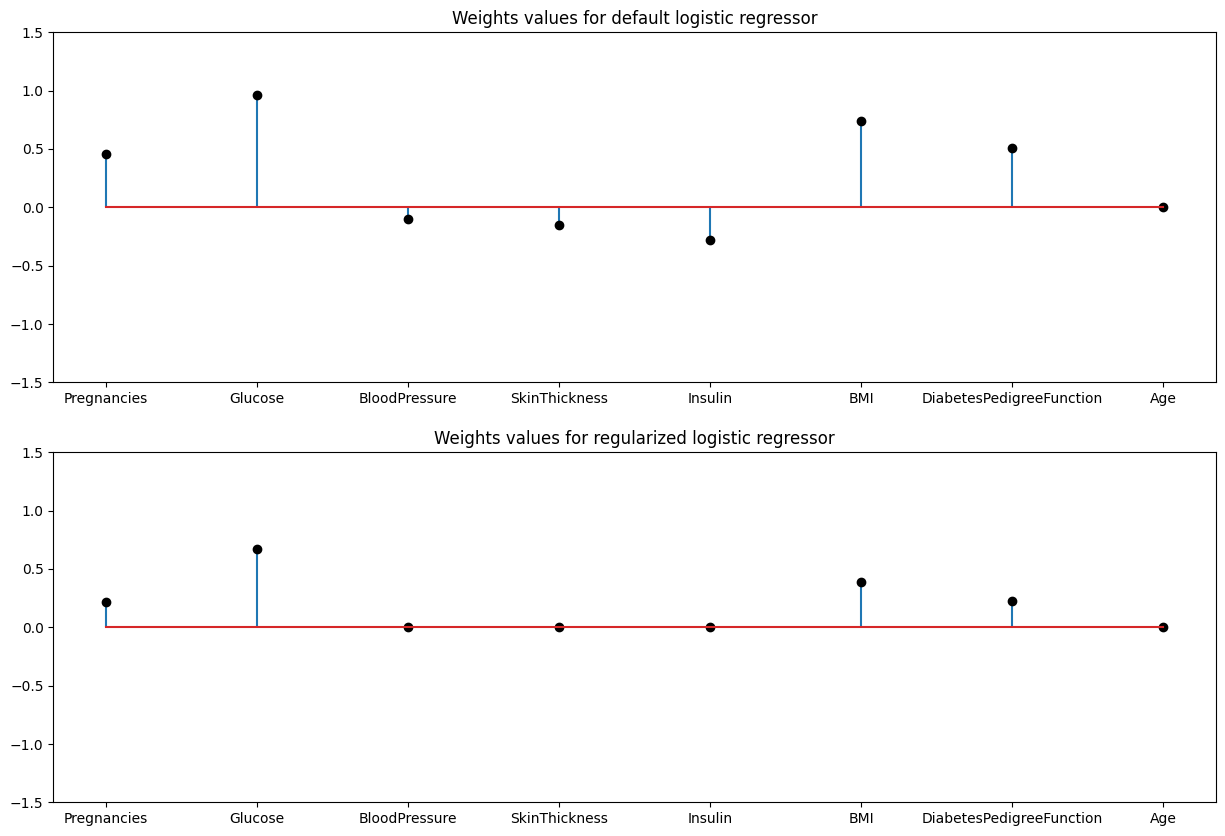

In [25]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Get the coefficients (weights) from clf and best_clf
w1 = clf.coef_.flatten()
w2 = best_clf.coef_.flatten()

# Create a list of x values (attributes)
x = [i for i in range(1, X_train.shape[1] + 1)]

# Plot the stem plot for the default logistic regressor
axes[0].stem(x, w1, markerfmt='ko')
axes[0].set_xticks(x, minor=False)
axes[0].set_xticklabels(attributes)
axes[0].set_ylim(ymin=-1.5, ymax=1.5)
axes[0].set_title("Weights values for default logistic regressor")

# Plot the stem plot for the regularized logistic regressor
axes[1].stem(x, w2, markerfmt='ko')
axes[1].set_xticks(x, minor=False)
axes[1].set_xticklabels(attributes)
axes[1].set_ylim(ymin=-1.5, ymax=1.5)
axes[1].set_title("Weights values for regularized logistic regressor")

# Display the plots
plt.show()

**Interpretation**

* The model exhibits a sparse structure, having eliminated variables such as Age, BloodPressure, and SkinThickness by assigning them zero weights, indicating their non-contribution to the predictive process. Consistent with initial observations, Glucose concentration emerges as the most influential feature. Other significant predictors include **BMI**, **DiabetesPedigreeFunction**, and **Pregnancies**, all showing a positive correlation with the occurrence of diabetes. Specifically, higher values of **Glucose**, **BMI**, and **DiabetesPedigreeFunction** are common among diabetic patients, reflecting the increased likelihood of diabetes in the presence of genetic predisposition, while a greater number of pregnancies is also associated with the condition.

***Comparing the performance of the models***

In [26]:
models_=[gd_lda, gd_qda, gnb, gd_clf]

data = {"model": ["LDA","QDA","GNB","LOGISTIC REGRESSION"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_],
      "AUC score": [roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1]) for model in models_]}

df = pd.DataFrame(data, columns=['model','Accuracy','AUC score'])
df

,model,Accuracy,AUC score
0,LDA,0.797066,0.864293
1,QDA,0.801956,0.857510
2,GNB,0.767726,0.831036
3,LOGISTIC REGRESSION,0.799511,0.868915


* So far, the best results have been obtained for linear models (LDA, LR) rather than for quadratic models (QDA, GNB).We will use the Logistic Regression because it is better than the LDA.

***Separability of the sample***

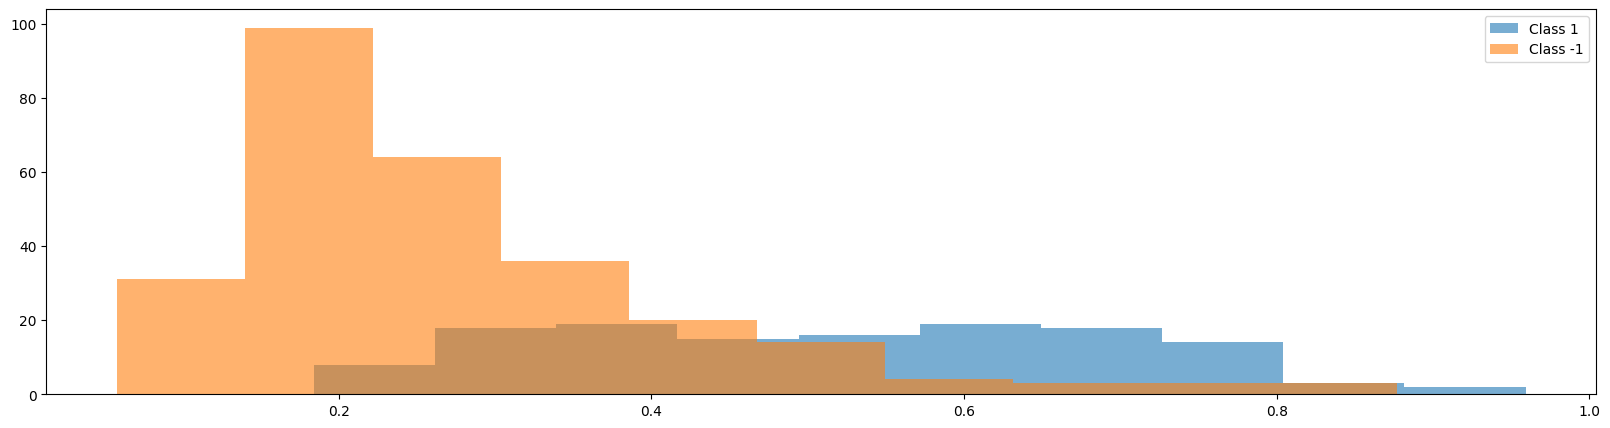

In [27]:
# Create a figure with a specific size
plt.figure(figsize=(20, 5))

# Get predicted probabilities for positive and negative classes
proba_positive = gd_clf.predict_proba(X_test)[:, 1][Y_test == 1]
proba_negative = gd_clf.predict_proba(X_test)[:, 1][Y_test == -1]

# Create histograms for the two classes with transparency and labels
plt.hist(proba_positive, alpha=0.6, label="Class 1")
plt.hist(proba_negative, alpha=0.6, label="Class -1")

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

**Interpretation**

* In our analysis, we employed a logistic regression classifier. The resulting plot reveals a suboptimal distinction between the two classes. Notably, a significant portion of the diabetic category—nearly half—registers a score below the 0.5 threshold, while the remainder surpasses it. This dispersion in the diabetic scores contrasts with the non-diabetic scores, which predominantly cluster around 0.2, suggesting the model more reliably predicts non-diabetic instances. Given the critical nature of correctly identifying diabetic cases, misclassifying a diabetic patient as non-diabetic poses a greater concern than the converse. To address this, we might consider adjusting the decision threshold to a lower value, such as 0.35, to improve the model's sensitivity to diabetic cases.

In [28]:
print("the ratio of true positive =", recall_score(Y_test,pred))

the ratio of true positive = 0.5606060606060606


* With this score, we can justify the intuition we had before, where only 53% of all people with diabetes are correctly classified as diabetic.

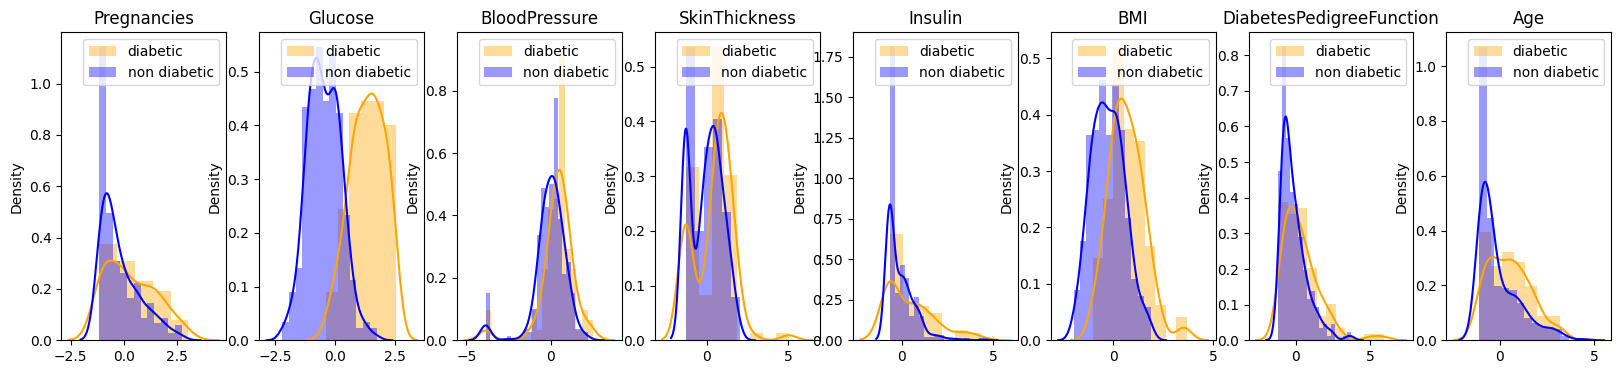

In [29]:
# Separability of classes

plt.figure(figsize=(20,4))
for i in range(8):
    plt.subplot(1,8,i+1)
    sns.distplot(X_test[np.argwhere(gd_clf.predict(X_test)==1),i],color="orange", label="diabetic")
    sns.distplot(X_test[np.argwhere(gd_clf.predict(X_test)==-1),i],color="blue", label="non diabetic")
    plt.title("%s" %attributes[i])
    plt.legend()
plt.show()


**Interpretation**

* From our analysis, in the context of diabetes risk, Glucose and BMI stand out as the primary factors that substantially elevate the likelihood of diabetes. Following these are the number of Pregnancies and the Diabetes Pedigree Function, which have a moderate but notable impact on diabetes risk, alongside Age.

  Conversely, features with minimal weights, such as Insulin and Skin Thickness, show overlapping histograms, indicating a lack of class separability and, hence, a lesser role in predicting diabetes.

* These insights are aligned with medical understanding. High levels of Glucose and BMI are widely recognized as key indicators of diabetes risk. Additionally, pregnancy is associated with gestational diabetes, and increased age is a known risk factor for developing the condition.

##  Nonlinear methods

***Random Forest***

In [30]:
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, Y_train)
pred = rf.predict(X_test)
print("Accuracy = ",accuracy_score(Y_test,pred))
print("AUC score = ",roc_auc_score(Y_test,rf.predict_proba(X_test)[:, 1]))

Accuracy =  0.7872860635696821
AUC score =  0.8622825730226452


**Interpretation**

* The Random Forest classifier with the default parameters does not show better performance than the linear models (logistic regressor and LDA).

In [31]:
rf_model = RandomForestClassifier(random_state=0)
param_grid= {
    "max_depth" : np.arange(1,50, 5),
    "n_estimators" : np.arange(50,250, 50) ,
    "max_features" : [2,4,6,8]
}
gd_rf = GridSearchCV(rf_model, param_grid, cv= 5)
gd_rf.fit(X_train, Y_train)
pred = gd_rf.predict(X_test)
print("Best parameters = ",gd_rf.best_params_)
print("Best score = ",gd_rf.best_score_)


Best parameters =  {'max_depth': 6, 'max_features': 4, 'n_estimators': 150}
Best score =  0.7366666666666666


In [32]:
models_=[rf, gd_rf]

data = {"model": ["Random Forest(Default)","Random Forest(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_],
      "AUC score": [roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1]) for model in models_]}

df_RF = pd.DataFrame(data, columns=['model','Accuracy','AUC score'])
df_RF

,model,Accuracy,AUC score
0,Random Forest(Default),0.787286,0.862283
1,Random Forest(grid search),0.797066,0.860983


**Interpretation**

* By tuning some hyperparameters of the random forest classifier, the accuracy and the AUC score remained almost the same.

***SVC***

In [33]:
svc = SVC(probability=True)
svc.fit(X_train, Y_train)
pred = svc.predict(X_test)
print("Accuracy = ",accuracy_score(Y_test,pred))
print("AUC score = ",roc_auc_score(Y_test,svc.predict_proba(X_test)[:, 1]))

Accuracy =  0.7872860635696821
AUC score =  0.8384750027349306


**Interpretation**

* The SVC classifier with the default parameters does not show better performance than the linear models (logistic regressor and LDA). In fact, we obtain an AUC score 0.83 slightly lower than the score of the linear models 0.86, while the accuracy is almost the same.

In [34]:
svc_model = SVC(probability=True)
param_grid = {'kernel':('linear', 'rbf'), 'C':[0.001, 0.01, 0.1, 1, 10, 100]}
gd_svc = GridSearchCV(svc_model, param_grid, cv= 5)
gd_svc.fit(X_train, Y_train)
pred = gd_svc.predict(X_test)

print("Best parameters = ",gd_svc.best_params_)
print("Best score = ",gd_svc.best_score_)

Best parameters =  {'C': 10, 'kernel': 'linear'}
Best score =  0.75


In [35]:
models_=[svc, gd_svc]

data = {"model": ["SVC(Default)","SVC(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_],
      "AUC score": [roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1]) for model in models_]}

df_SVC = pd.DataFrame(data, columns=['model','Accuracy','AUC score'])
df_SVC

,model,Accuracy,AUC score
0,SVC(Default),0.787286,0.838475
1,SVC(grid search),0.794621,0.864047


**Interpretation**

* Adjusting specific hyperparameters in the SVC classifier through cross-validation has enhanced its performance. Notably, there was an increment in accuracy, moving from 0.78 to 0.79, along with an increase in the AUC score from 0.83 to 0.86. Furthermore, the selection of the linear kernel as the optimal choice suggests that linear models are particularly effective for this dataset.

***MLP Classifier***

In [36]:
mlp = MLPClassifier()
mlp.fit(X_train, Y_train)
pred = mlp.predict(X_test)
print("Accuracy = ",accuracy_score(Y_test,pred))
print("AUC score = ",roc_auc_score(Y_test,mlp.predict_proba(X_test)[:, 1]))

Accuracy =  0.7970660146699267
AUC score =  0.8559512088392955


**Interpretation**

* The MLP classifier with the default parameters does not show better performance than the linear models (logistic regressor and LDA).

In [37]:
mlp_model = MLPClassifier()
param_grid = {"learning_rate" :["constant", "invscaling", "adaptive"],"hidden_layer_sizes" : [50,100,400,800,1000],"activation": ["identity","relu"]}
gd_mlp = GridSearchCV(mlp_model, param_grid, cv= 5)
gd_mlp.fit(X_train, Y_train)
pred = gd_mlp.predict(X_test)

print("Best parameters = ",gd_mlp.best_params_)
print("Best score = ",gd_mlp.best_score_)


Best parameters =  {'activation': 'identity', 'hidden_layer_sizes': 50, 'learning_rate': 'constant'}
Best score =  0.7633333333333333


In [38]:
models_=[mlp, gd_mlp]

data = {"model": ["MLP(Default)","MLP(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_],
      "AUC score": [roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1]) for model in models_]}

df_MlP = pd.DataFrame(data, columns=['model','Accuracy','AUC score'])
df_MlP

,model,Accuracy,AUC score
0,MLP(Default),0.797066,0.855951
1,MLP(grid search),0.797066,0.862761


**Interpretation**

* Through the process of cross-validation and hyperparameter optimization of the MLP classifier, there was a notable enhancement in its efficacy. The accuracy experienced a rise from 0.78 to 0.80, and the AUC score also saw an improvement, going from 0.85 to 0.86. Additionally, the selection of 'Identity' as the optimal activation function, which is a linear activation, suggests a preference for linear models with this particular dataset, as they appear to yield better results.

***Gradient Boosting***

In [39]:
xgb = GradientBoostingClassifier()
xgb.fit(X_train, Y_train)
pred = xgb.predict(X_test)
print("Accuracy = ",accuracy_score(Y_test,pred))
print("AUC score = ",roc_auc_score(Y_test,xgb.predict_proba(X_test)[:, 1]))

Accuracy =  0.7603911980440098
AUC score =  0.8273711847719067


**Interpretation**

* The gradientboost classifier with the default parameters does not show better performance than the linear models (logistic regressor and LDA).

In [40]:
xgb_model = GradientBoostingClassifier()
param_grid = {
        'min_samples_leaf': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 4, 5]
        }
gd_xgb = GridSearchCV(xgb_model, param_grid, cv= 5)
gd_xgb.fit(X_train, Y_train)
pred = gd_xgb.predict(X_test)

print("Best parameters = ",gd_xgb.best_params_)
print("Best score = ",gd_xgb.best_score_)

Best parameters =  {'max_depth': 3, 'min_samples_leaf': 1, 'n_estimators': 150, 'subsample': 0.6}
Best score =  0.7166666666666666


In [41]:
models_ = [xgb, gd_xgb]

data = {"model": ["XGB(Default)","XGB(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_],
      "AUC score": [roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1]) for model in models_]}

df_xgb = pd.DataFrame(data, columns=['model','Accuracy','AUC score'])
df_xgb

,model,Accuracy,AUC score
0,XGB(Default),0.760391,0.827371
1,XGB(grid search),0.772616,0.818756


**Interpretation**

* After adjusting various hyperparameters of the Random Forest classifier, there was minimal change in performance metrics. The accuracy saw a slight improvement, rising marginally from 0.76 to 0.77, whereas the AUC score remained unchanged

## Comparison and interpretation


In [42]:
models_=[gd_lda, gd_qda, gnb, gd_clf, gd_rf, gd_svc, gd_mlp, gd_xgb]

data = {"model": ["LDA","QDA","GNB","LOGISTIC REGRESSION", "Random Forest", "SVC", "MLP", "Gradient_Boost"],
      "Accuracy": [np.round(accuracy_score(Y_test,model.predict(X_test)),3) for model in models_],
      "AUC score": [np.round(roc_auc_score(Y_test,model.predict_proba(X_test)[:, 1]),3) for model in models_]}

df = pd.DataFrame(data, columns=['model','Accuracy','AUC score'])
df

,model,Accuracy,AUC score
0,LDA,0.797,0.864
1,QDA,0.802,0.858
2,GNB,0.768,0.831
3,LOGISTIC REGRESSION,0.800,0.869
4,Random Forest,0.797,0.861
5,SVC,0.795,0.864
6,MLP,0.797,0.863
7,Gradient_Boost,0.773,0.819


**Interpretation**

* We see that the logistic regression , SVC and MLP models in the above table have the best performance regarding accuracy and AUC.

* From a medical/practical point of view, the best model is the one that gives the best performance, and is also interpretable. Thus, from the above results, we can say that logistic regression is the best model, because it is a linear model, so it is interpretable, it gives the best performance, and it is a sparse model, so we have fewer variables to use for prediction. Non-linearity is not necessary here because we got better results with linear models.

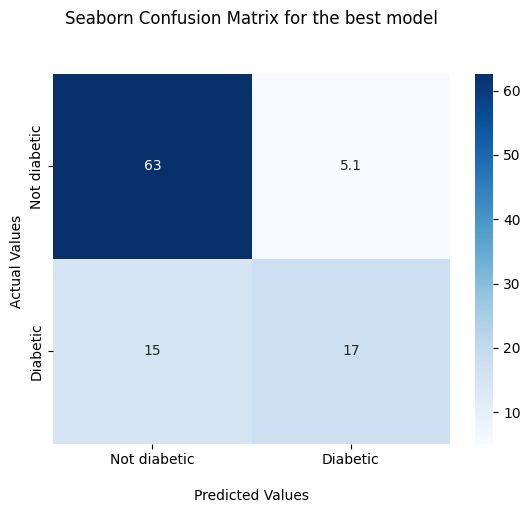

In [43]:
conf_clf = confusion_matrix(Y_test, gd_clf.predict(X_test))/X_test.shape[0]*100

ax=sns.heatmap(conf_clf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix for the best model\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels
ax.xaxis.set_ticklabels(['Not diabetic','Diabetic'])
ax.yaxis.set_ticklabels(['Not diabetic','Diabetic'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [44]:
print(f'The false negative rate for the logistic regression classifier is :{round((1 - recall_score(Y_test,gd_clf.predict(X_test)))*100, 2)}%')

The false negative rate for the logistic regression classifier is :46.21%


**Interpretation**

* For applications in this domain, prioritizing a high True Positive Rate (TPR)—or conversely, minimizing the False Negative Rate (FNR), since FNR is simply 1 minus the TPR—is crucial. This emphasis is due to the significant implications of false negatives in medical diagnostics, particularly in diabetes detection. A high TPR is essential because failing to correctly identify diabetic individuals (resulting in false negatives) can have more severe consequences than falsely identifying non-diabetics as diabetics. A substantial FNR implies that a considerable portion of diabetic patients might not be identified by the model, potentially leading to a lack of necessary medical intervention. Such misclassification could significantly impact clinical decisions, making it imperative to adjust our model to ensure that it reliably identifies as many diabetic patients as possible.

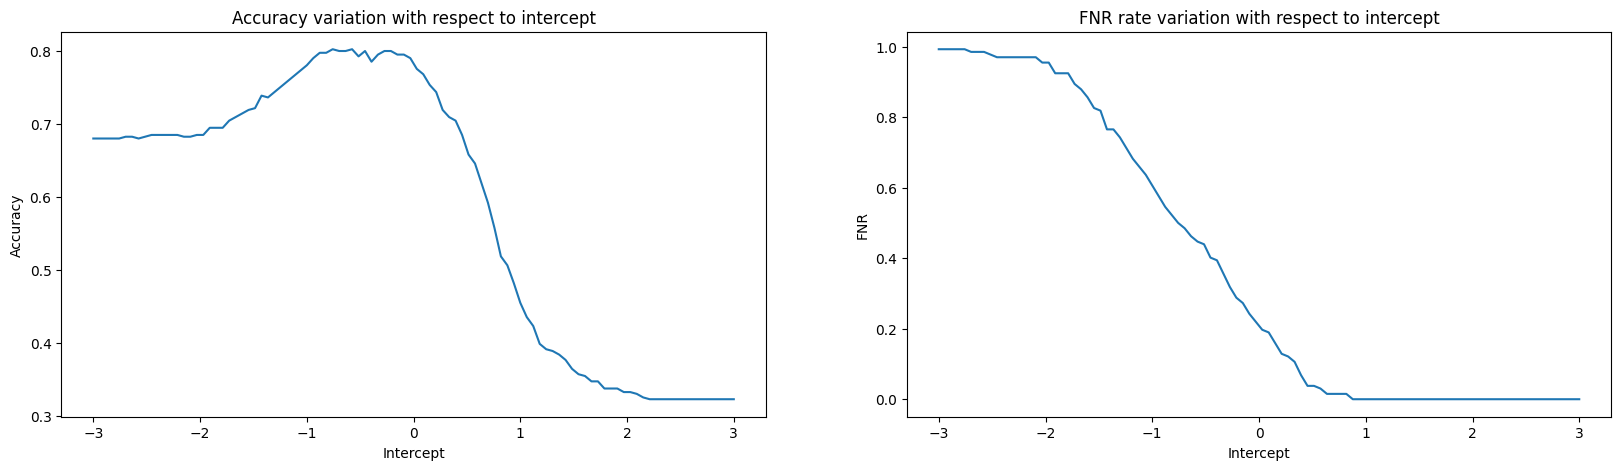

In [45]:
# Get the best model from GridSearchCV
best_model = gd_clf.best_estimator_

# Generate a range of intercept values
intercepts = np.linspace(-3, 3, 100)

# Initialize lists to store results
best_intercept = []
accuracies = []
false_negative_rates = []

# Iterate through intercept values
for i, intercept in enumerate(intercepts):
    # Set the intercept for the best model
    best_model.intercept_ = intercept

    # Make predictions with the modified model
    predictions = best_model.predict(X_test)

    # Calculate False Negative Rate (FNR) and accuracy
    fnr = 1 - recall_score(Y_test, predictions)
    accuracy = accuracy_score(Y_test, predictions)

    # Append FNR and accuracy to lists
    false_negative_rates.append(fnr)
    accuracies.append(accuracy)

    # Store the first intercept value with FNR <= 0.1
    if not best_intercept and fnr <= 0.1:
        best_intercept.append(fnr)
        index = i

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(20, 5))

# Plot accuracy variation with respect to intercept
ax[0].plot(intercepts, accuracies)
ax[0].set_xlabel("Intercept")
ax[0].set_title("Accuracy variation with respect to intercept")
ax[0].set_ylabel("Accuracy")

# Plot FNR rate variation with respect to intercept
ax[1].plot(intercepts, false_negative_rates)
ax[1].set_xlabel("Intercept")
ax[1].set_title("FNR rate variation with respect to intercept")
ax[1].set_ylabel("FNR")

# Display the plots
plt.show()

**Interpretation**

It is observed that raising the intercept leads to a reduction in the False Negative Rate (FNR). However, it is crucial to be mindful of the accuracy, which shows a decline when the intercept exceeds zero and continues to decrease as the intercept is further increased

In [49]:
print(f"The value of the chosen intercept: {best_intercept[0]}")
print(f"FNR value: = {false_negative_rates[index]}")
print(f"accuracy value = {accuracies[index]}")

The value of the chosen intercept: 0.06818181818181823
FNR value: = 0.06818181818181823
accuracy value = 0.7041564792176039


#  Predicting Classes on the Digits dataset

## Loading the data

In [50]:
x2 = np.load("digits.npz")
X_train, X_test, Y_train, Y_test = x2["x"], x2["xt"], x2["y"], x2["yt"]

In [51]:
#Normalizing_Data
X_train = X_train/255
X_test = X_test/255

## Evaluate the different supervised methods

**LDA**

In [52]:
Lda = LDA()
Lda.fit(X_train, np.ravel(Y_train))
pred = Lda.predict(X_test)
print("For default parametres")
print(f"Accuracy : {np.round((accuracy_score(np.ravel(Y_test),pred)),3)}")

For default parametres
Accuracy : 0.933


In [53]:
Lda_model = LDA()
param_grid = {'shrinkage' : np.linspace(0.1,1,10),"solver":['lsqr','eigen']}
gd_lda = GridSearchCV(Lda_model, param_grid, cv=5)
gd_lda.fit(X_train, np.ravel(Y_train))

pred = gd_lda.predict(X_test)
print("Best parameters = ",gd_lda.best_params_)
print("Best score = ",gd_lda.best_score_)

Best parameters =  {'shrinkage': 0.8, 'solver': 'lsqr'}
Best score =  0.9573333333333334


In [54]:
models_=[Lda, gd_lda]

data = {"model": ["LDA(Default)","LDA(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_]}

df_lda = pd.DataFrame(data, columns=['model','Accuracy'])
df_lda

,model,Accuracy
0,LDA(Default),0.933333
1,LDA(grid search),0.940667


**Logistic Regression**

In [55]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, np.ravel(Y_train))
pred = clf.predict(X_test)
print("For default parametres")
print(f"Accuracy : {np.round((accuracy_score(np.ravel(Y_test),pred)),3)}")

For default parametres
Accuracy : 0.965


In [56]:
clf_model = LogisticRegression(solver="saga", random_state=0)
param_grid = {"C" : np.logspace(0,1,10)}
gd_clf = GridSearchCV(clf_model, param_grid, cv = 5)
gd_clf.fit(X_train, np.ravel(Y_train))

pred = gd_clf.predict(X_test)
print("Best parameters = ",gd_clf.best_params_)
print("Best score = ",gd_clf.best_score_)

Best parameters =  {'C': 1.0}
Best score =  0.9770000000000001


In [57]:
models_=[clf, gd_clf]

data = {"model": ["LR(Default)","LR(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_]}

df_lr = pd.DataFrame(data, columns=['model','Accuracy'])
df_lr

,model,Accuracy
0,LR(Default),0.965333
1,LR(grid search),0.967333


**SVC**

In [58]:
svc = SVC()
svc.fit(X_train, np.ravel(Y_train))
pred = svc.predict(X_test)
print("For default parametres")
print(f"Accuracy : {np.round((accuracy_score(np.ravel(Y_test),pred)),3)}")

For default parametres
Accuracy : 0.983


In [59]:
svc_modl = SVC(kernel='rbf')
param_grid = {"C" : np.logspace(0,4,10)}
gd_svc = GridSearchCV(svc_model, param_grid, cv= 5)
gd_svc.fit(X_train, np.ravel(Y_train))
pred = gd_svc.predict(X_test)

print("Best parameters = ",gd_svc.best_params_)
print("Best score = ",gd_svc.best_score_)


Best parameters =  {'C': 7.742636826811269}
Best score =  0.991


In [60]:
models_=[svc, gd_svc]

data = {"model": ["SVC(Default)","SVC(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_]}

df_svc = pd.DataFrame(data, columns=['model','Accuracy'])
df_svc

,model,Accuracy
0,SVC(Default),0.983333
1,SVC(grid search),0.983333


**MLP**

In [61]:
mlp = MLPClassifier()
mlp.fit(X_train, np.ravel(Y_train))
pred = mlp.predict(X_test)
print("For default parametres")
print(f"Accuracy : {np.round((accuracy_score(np.ravel(Y_test),pred)),3)}")

For default parametres
Accuracy : 0.977


In [62]:
mlp_model = MLPClassifier(learning_rate="adaptive")
param_grid = {"hidden_layer_sizes" : [50,100,400,800]}
gd_mlp = GridSearchCV(mlp_model, param_grid, cv= 5)
gd_mlp.fit(X_train, np.ravel(Y_train))
pred = gd_mlp.predict(X_test)

print("Best parameters = ",gd_mlp.best_params_)
print("Best score = ",gd_mlp.best_score_)

Best parameters =  {'hidden_layer_sizes': 800}
Best score =  0.9879999999999999


In [63]:
models_=[mlp, gd_mlp]

data = {"model": ["MLP(Default)","MLP(grid search)"],
      "Accuracy": [accuracy_score(Y_test,model.predict(X_test)) for model in models_]}

df_svc = pd.DataFrame(data, columns=['model','Accuracy'])
df_svc

,model,Accuracy
0,MLP(Default),0.977333
1,MLP(grid search),0.984667


## Interpreting the classifiers

In [64]:
models_=[gd_lda, gd_clf, gd_svc, gd_mlp]

data = {"model": ["LDA","LOGISTIC REGRESSION","SVC","MLP"],
      "Accuracy": [accuracy_score(np.ravel(Y_test),model.predict(X_test)) for model in models_],
      "f1_score" : [f1_score(np.ravel(Y_test),model.predict(X_test),average="macro") for model in models_]}

df = pd.DataFrame(data, columns=['model','Accuracy', "f1_score"])
df

,model,Accuracy,f1_score
0,LDA,0.940667,0.940758
1,LOGISTIC REGRESSION,0.967333,0.967318
2,SVC,0.983333,0.983324
3,MLP,0.984667,0.984662


**Interpretation**

* LDA: This model has an accuracy of approximately 94.07% and an F1 score of 94.08%, which is quite high, indicating that it performs well on this dataset.

* LOGISTIC REGRESSION: The logistic regression model has an accuracy of about 96.73% and an F1 score of 96.73% as well, which is better than the LDA model, suggesting it is more effective at classifying instances in this context.

* SVC: The Support Vector Classifier shows an even higher accuracy and F1 score of roughly 98.33%, indicating a very high level of performance on this dataset.

* MLP: The Multi-Layer Perceptron has the highest metrics among the models listed, with an accuracy of 98.4% and an F1 score of 98.4%. This suggests that the neural network and SVC has the best performance for this particular task out of all the models evaluated.



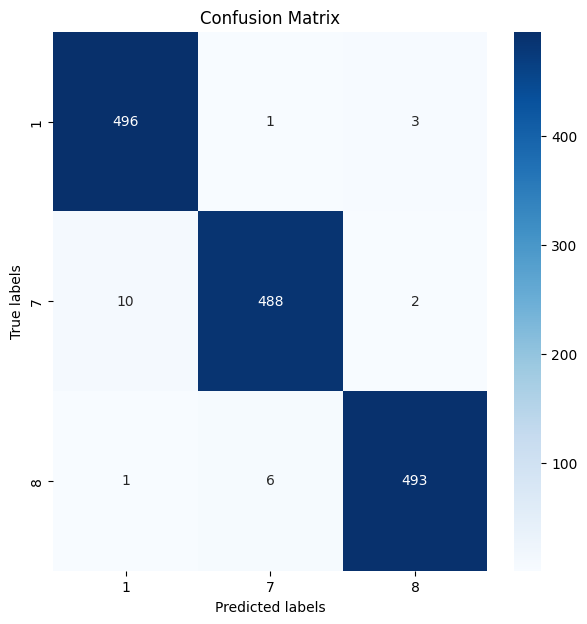

In [65]:
fig, ax = plt.subplots(figsize=(7,7))
preds = gd_mlp.predict(X_test)
cm = confusion_matrix(Y_test,preds,labels=gd_mlp.classes_)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap="Blues")
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['1', '7','8']); ax.yaxis.set_ticklabels(['1', '7','8'])
plt.show()

In [66]:
print(classification_report(Y_test,preds,digits=4))

              precision    recall  f1-score   support

           1     0.9783    0.9920    0.9851       500
           7     0.9859    0.9760    0.9809       500
           8     0.9900    0.9860    0.9880       500

    accuracy                         0.9847      1500
   macro avg     0.9847    0.9847    0.9847      1500
weighted avg     0.9847    0.9847    0.9847      1500



**Interpretation**

From this confusion matrix,we can see:
* Class "1" exhibits the highest precision, indicating it is identified with the least number of false positives. Within the confusion matrix, there is a single instance where class "1" was mislabeled as class "7" and 3 as class "8".

* Classes "7" and "8" share identical precision values, suggesting a similar rate of correct predictions to total predicted instances for these classes. Specifically, for class "7", there are notable misclassifications where 9 instances were mistakenly identified as class "1" and 4 instances as class "8". This confusion may be attributed to the visual similarities between the numeral "7" and "1", which both feature angular and linear elements. In the case of class "8", misclassifications included 6 instances identified as class "7" and 1 as class "1".

These patterns of misclassification imply that classes "7" and "8" present the greatest challenge for the classifier in terms of recognition .

Regarding discrimination difficulties, class "8" is often confused with class "7", with 6 instances of class "8" being incorrectly classified as class "7". Similarly, the confusion between classes "1" and "7" is evident, with 9 instances of class "7" being incorrectly identified as class "1". These instances of misclassification highlight the particular challenge in distinguishing between these numerals.

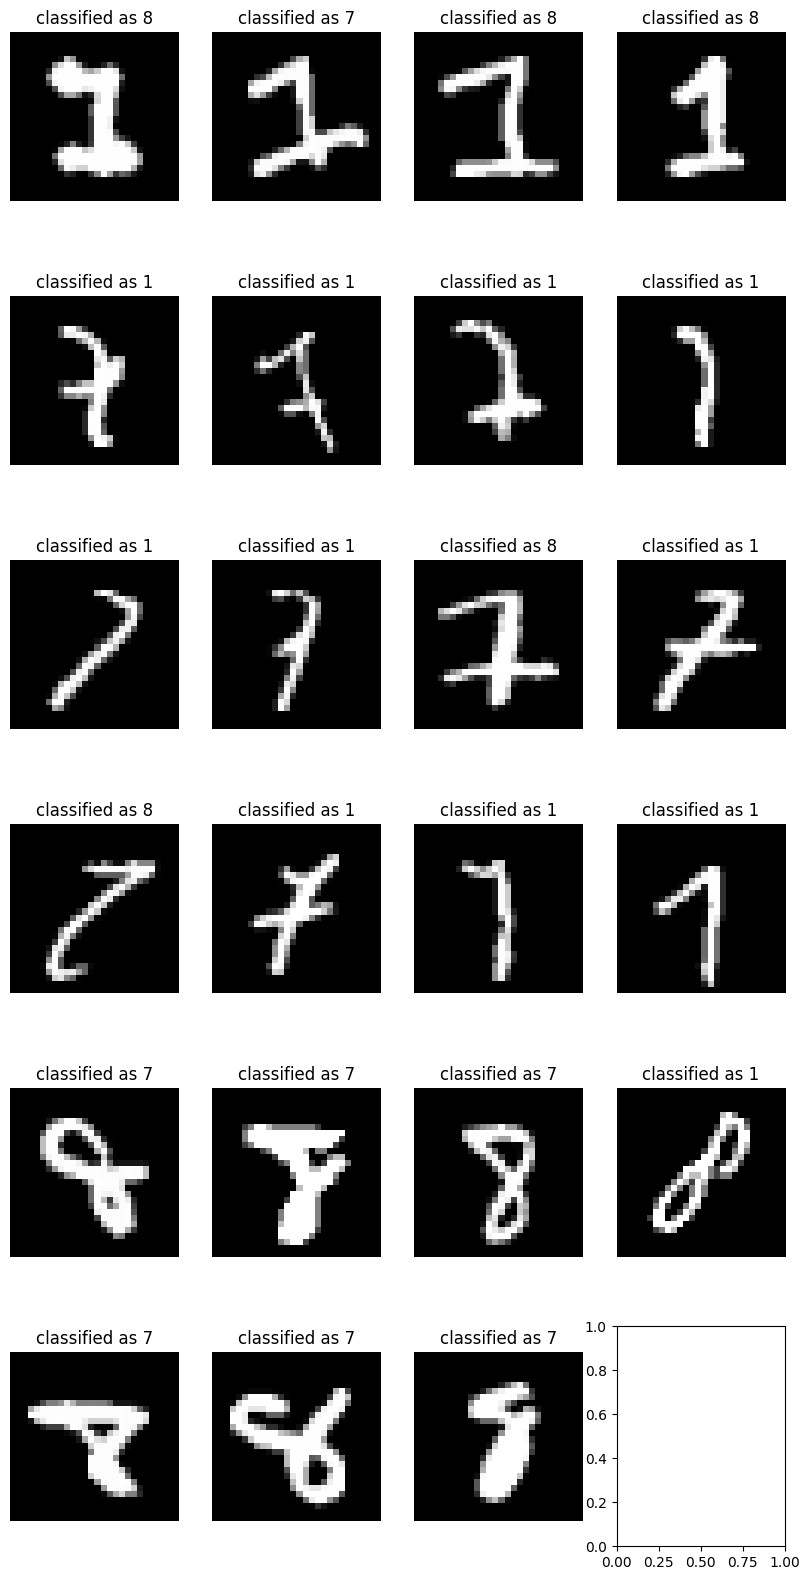

In [67]:
pred = gd_mlp.predict(X_test)
indx = np.where(pred!=np.ravel(Y_test))

fig, ax = plt.subplots(6,4,figsize=(10,20))
for i in range(23):
  ax.flatten()[i].imshow((X_test[indx[0][i]]).reshape(28,28),cmap="gray")
  ax.flatten()[i].set_title("classified as "+str(pred[indx[0][i]]))
  ax.flatten()[i].axis('off')
plt.show()


* The misclassified samples from class 1 are typically not challenging to identify. However, certain samples from this class that were incorrectly labeled as class 8 share a curvature that could potentially confuse the classifier. On the other hand, some class 1 samples mislabeled as class 7 bear a strong resemblance to the numeral 7, which accounts for the misclassification.

* Regarding class 7, a significant number of its samples were erroneously classified as class 1. This misclassification may be attributable to the striking similarity between the two digits, to the extent that even human observers might struggle to distinguish between them in certain instances.

## Adversial Examples

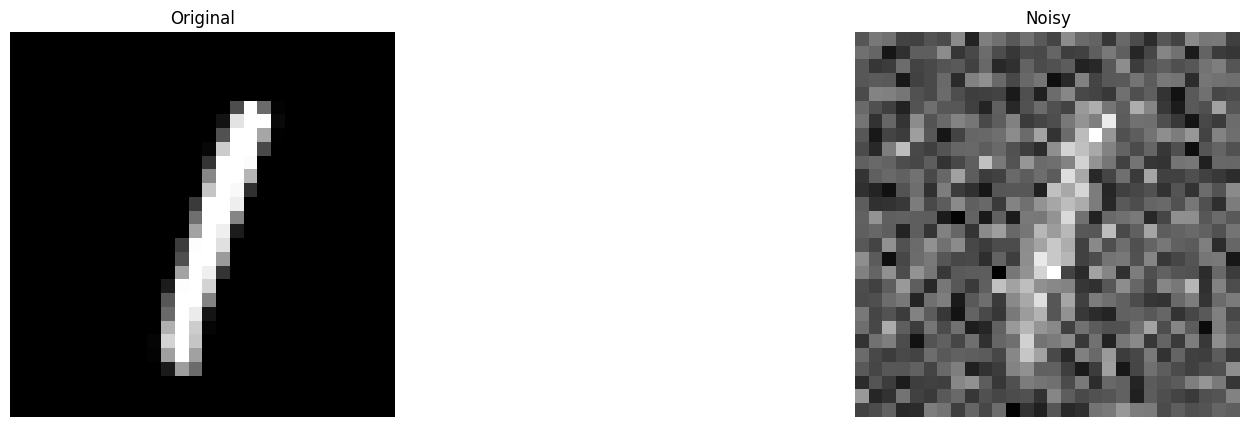

In [68]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
pred = gd_mlp.predict(X_test)
indx = np.where(pred==np.ravel(Y_test))
original = (X_test[indx[0][1]]).reshape(28,28)
ax[0].imshow(original,cmap="gray")
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(original+np.random.normal(0, 0.35, original.shape),cmap="gray")
ax[1].set_title("Noisy")
ax[1].axis("off")

plt.show()

In [69]:
prediction = []
adv_ex = []
adv_class = []
for i in range(1000):
  noise = np.random.normal(0, 0.35, original.shape)
  noisy = original + noise
  pred = gd_mlp.predict(noisy.reshape((1,28*28)))
  prediction.append(pred)
  if (pred!=Y_test[indx[0][1]]):
    adv_ex.append(noisy)
    adv_class.append(pred)

print("Accuracy = ",accuracy_score(np.ones(1000),prediction))

Accuracy =  0.975


**Interpretation**

* The classifier exhibits considerable robustness, maintaining a high accuracy near 1 even with an increase in the standard deviation up to 1. To explore adversarial samples, we deliberately selected a standard deviation value that resulted in an accuracy lower than 1.

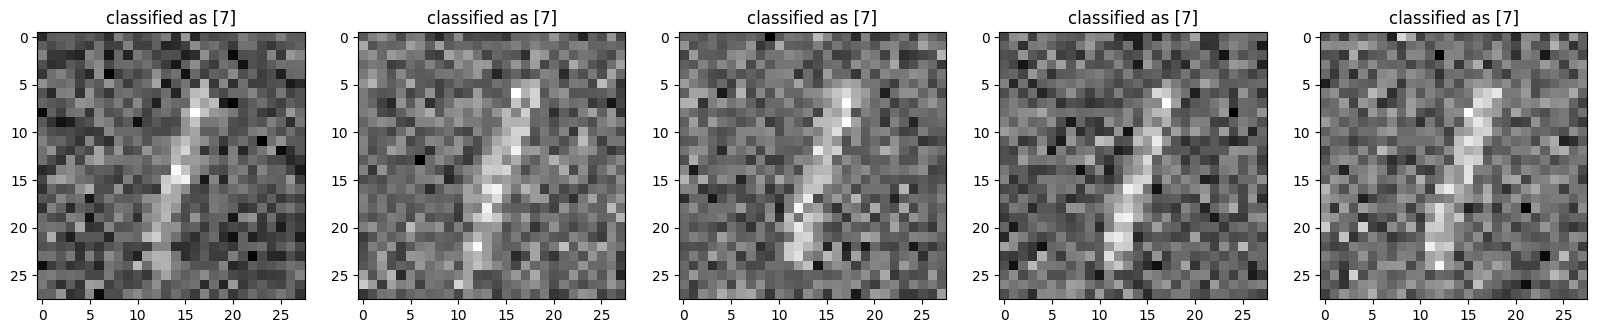

In [70]:
fig, ax = plt.subplots(1,5,figsize=(20,5))
for i in range(5):
  ax[i].imshow(adv_ex[i],cmap="gray")
  ax[i].set_title("classified as "+str(adv_class[i]))

**Interpretation**

* In this observation, despite achieving a high accuracy, our model demonstrates sensitivity to noise, leading to misclassifications. As illustrated in this figure, it notably misclassifies instances belonging to class 1.

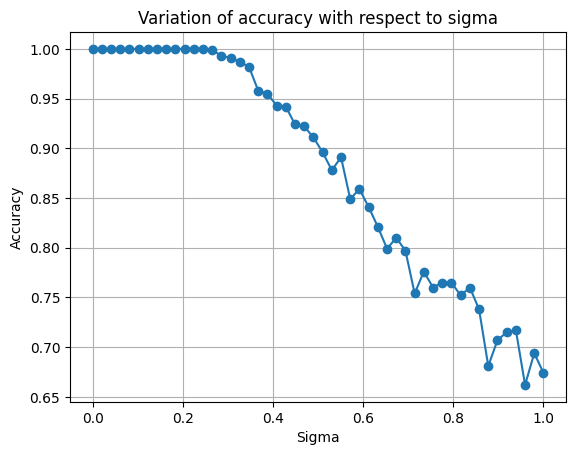

In [86]:
# Generate a range of noise levels (sigma values)
noise_levels = np.linspace(0, 1)
accuracies = []

for sigma in noise_levels:
    predictions = []
    for _ in range(1000):
        # Generate random noise with a normal distribution
        noise = np.random.normal(0, sigma, original.shape)

        # Add noise to the original data
        noisy_data = original + noise

        # Make predictions with the noisy data
        predictions.append(gd_mlp.predict(noisy_data.reshape((1, 28*28))))

    # Calculate accuracy and append to the list
    accuracies.append(accuracy_score(np.ones(1000), predictions))

# Create a plot of noise levels vs. accuracy
plt.plot(noise_levels, accuracies, marker='o', linestyle='-')
plt.xlabel("Sigma")
plt.ylabel("Accuracy")
plt.title("Variation of accuracy with respect to sigma")
plt.grid(True)
plt.show()

**Interpretation**

* By elevating the standard deviation, we observe a notable impact on the model's susceptibility to manipulation. The accuracy consistently declines with each increment in the standard deviation value.

## CNN

In [72]:
# Reshape the training and test data
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert the training and test labels to categorical format
y_train = to_categorical(Y_train[:, 0])
y_test = to_categorical(Y_test[:, 0])

In [73]:
# Create a Sequential model
model_cnn = models.Sequential()

# Add Convolutional layers with ReLU activation and padding
model_cnn.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model_cnn.add(layers.Conv2D(28, (3, 3), activation='relu', padding="same"))
model_cnn.add(layers.MaxPooling2D((2, 2)))

# Flatten the output
model_cnn.add(layers.Flatten())

# Add Dense layers with ReLU activation
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.Dense(9, activation='softmax'))

# Display the model summary
model_cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       1280      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 28)        16156     
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 28)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5488)              0         
                                                                 
 dense (Dense)               (None, 64)                351296    
                                                        

In [74]:
# Compile the CNN model
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
model_cnn.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
47/47 [==============================] - 33s 671ms/step - loss: 0.2949 - accuracy: 0.9113
Epoch 2/10
47/47 [==============================] - 32s 683ms/step - loss: 0.0687 - accuracy: 0.9793
Epoch 3/10
47/47 [==============================] - 31s 660ms/step - loss: 0.0451 - accuracy: 0.9863
Epoch 4/10
47/47 [==============================] - 33s 703ms/step - loss: 0.0461 - accuracy: 0.9863
Epoch 5/10
47/47 [==============================] - 39s 826ms/step - loss: 0.0250 - accuracy: 0.9900
Epoch 6/10
47/47 [==============================] - 31s 667ms/step - loss: 0.0203 - accuracy: 0.9950
Epoch 7/10
47/47 [==============================] - 32s 692ms/step - loss: 0.0154 - accuracy: 0.9947
Epoch 8/10
47/47 [==============================] - 32s 679ms/step - loss: 0.0109 - accuracy: 0.9970
Epoch 9/10
47/47 [==============================] - 34s 721ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 10/10
47/47 [==============================] - 36s 761ms/step - loss: 0.0026 - accura

In [75]:
# Evaluate the model on the test data and print the test accuracy
test_accuracy = model_cnn.evaluate(x_test, y_test, verbose=0)[1]
print('Test accuracy:', test_accuracy)

Test accuracy: 0.9906666874885559


* We get an enhanced  accuracy.

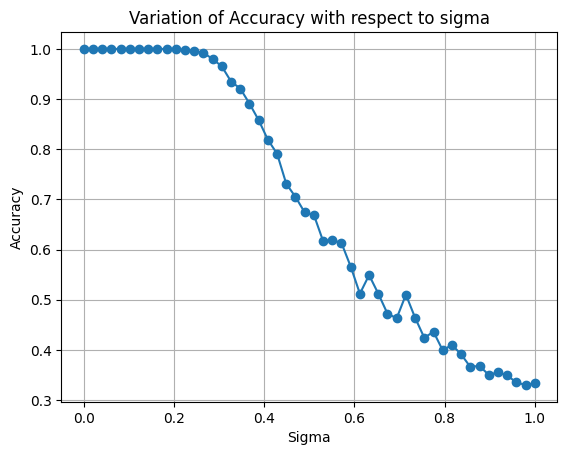

In [84]:
# Initialize lists to store sigma and accuracy values
sigmas = []
accuracies = []

for sigma in noise_levels:
    # Create arrays to store noisy images and labels
    x_imgs = np.zeros((1000, 28, 28, 1))
    y_imgs = np.zeros((1000, 9))

    # Populate arrays with original data
    for i in range(1000):
        x_imgs[i] = original.reshape(28, 28, 1)
        y_imgs[i] = y_test[indx[0][1]]

    # Generate random noise with a normal distribution
    noise = np.random.normal(0, sigma, x_imgs.shape)

    # Add noise to the images
    noisy_imgs = x_imgs + noise

    # Evaluate the model on noisy images and store accuracy
    score = model_cnn.evaluate(noisy_imgs, y_imgs, verbose=False)

    # Append sigma and accuracy to the respective lists
    sigmas.append(sigma)
    accuracies.append(score[1])

# Create a line plot of sigma vs. accuracy
plt.plot(sigmas, accuracies, marker='o', linestyle='-')
plt.xlabel("Sigma")
plt.ylabel("Accuracy")
plt.title("Variation of Accuracy with respect to sigma")
plt.grid(True)
plt.show()

CNNs exhibit a vulnerability to adversarial examples, revealing a heightened sensitivity, which stands as a notable drawback of this architecture.

# Conclusion

This lab has been instrumental in enhancing my comprehension of model evaluation metrics, emphasizing the importance of considering metrics beyond mere accuracy. It underscored the significance of selecting an appropriate metric tailored to the specific problem at hand, particularly in medical scenarios where disease cases constitute the minority class. Our focus on metrics such as recall, which captures the true positive rate, and the delicate balance between recall and precision, has been illuminating.

Additionally, this practical session afforded us the opportunity to apply a diverse range of classification algorithms. This hands-on experience not only served as a comprehensive review but also equipped me with valuable skills for future interviews and real-world data analysis challenges.